# Data Cleaning

### Data Integrity

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('CAvideos.csv')

# Check for inconsistencies in data types and format
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40881 non-null  object
 1   trending_date           40881 non-null  object
 2   title                   40881 non-null  object
 3   channel_title           40881 non-null  object
 4   category_id             40881 non-null  int64 
 5   publish_time            40881 non-null  object
 6   tags                    40881 non-null  object
 7   views                   40881 non-null  int64 
 8   likes                   40881 non-null  int64 
 9   dislikes                40881 non-null  int64 
 10  comment_count           40881 non-null  int64 
 11  thumbnail_link          40881 non-null  object
 12  comments_disabled       40881 non-null  bool  
 13  ratings_disabled        40881 non-null  bool  
 14  video_error_or_removed  40881 non-null  bool  
 15  de

### Missing Data Handling

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Fill missing values (example: using mean for numerical columns)
df['likes'] = df['likes'].fillna(df['likes'].mean())
df['dislikes'] = df['dislikes'].fillna(df['dislikes'].mean())
df['comment_count'] = df['comment_count'].fillna(0)  # Assuming 0 for comments disabled

# Verify missing values after handling
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values before handling:
 video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1296
dtype: int64
Missing values after handling:
 video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled       

### Duplicate Removal

In [6]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates before removal: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Verify duplicates after removal
duplicates_after = df.duplicated().sum()
print(f"Number of duplicates after removal: {duplicates_after}")

Number of duplicates before removal: 0
Number of duplicates after removal: 0


### Standardization

In [8]:
# Standardize column formats (specify the correct date format)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ', errors='coerce')

# Convert category_id to string if it's being used as a categorical variable
df['category_id'] = df['category_id'].astype(str)

# Check the updated data types
print(df.dtypes)

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                       object
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
dtype: object


### Outlier Detection

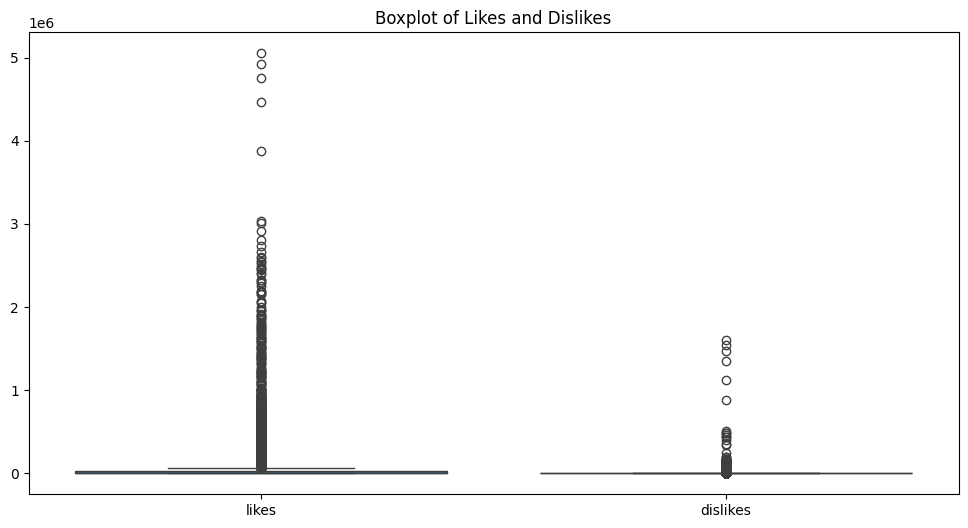

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of likes and dislikes to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['likes', 'dislikes']])
plt.title('Boxplot of Likes and Dislikes')
plt.show()

# Remove outliers using the IQR method
Q1 = df['likes'].quantile(0.25)
Q3 = df['likes'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['likes'] >= lower_bound) & (df['likes'] <= upper_bound)]

# Repeat for dislikes or any other column of interest